<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Raw-data" data-toc-modified-id="Get-Raw-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Raw data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#overall" data-toc-modified-id="overall-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>overall</a></span></li><li><span><a href="#review-per-person" data-toc-modified-id="review-per-person-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>review per person</a></span></li><li><span><a href="#criteria-per-person" data-toc-modified-id="criteria-per-person-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>criteria per person</a></span></li><li><span><a href="#review-per-game" data-toc-modified-id="review-per-game-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>review per game</a></span></li><li><span><a href="#performance-per-game" data-toc-modified-id="performance-per-game-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>performance per game</a></span></li></ul></li><li><span><a href="#Filter-Data-and-Split-Data" data-toc-modified-id="Filter-Data-and-Split-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filter Data and Split Data</a></span></li><li><span><a href="#Base-model-as-benchmark" data-toc-modified-id="Base-model-as-benchmark-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Base model as benchmark</a></span><ul class="toc-item"><li><span><a href="#overall-average-as-prediction" data-toc-modified-id="overall-average-as-prediction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>overall average as prediction</a></span></li><li><span><a href="#Person-perference-as-prediction" data-toc-modified-id="Person-perference-as-prediction-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Person perference as prediction</a></span></li><li><span><a href="#Game-performance-as-prediction" data-toc-modified-id="Game-performance-as-prediction-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Game performance as prediction</a></span></li><li><span><a href="#Combine-Person-and-Game" data-toc-modified-id="Combine-Person-and-Game-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Combine Person and Game</a></span></li></ul></li></ul></div>

In [1]:
import os
import gzip
import json
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from config import RAW_DIR, PRE_DIR, RES_DIR
from utils.data_porter import read_from_csv, save_to_csv

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Get Raw data

In [2]:
df_rating_dir = os.path.join(RAW_DIR, 'Video_Games.csv')
gz_review_dir = os.path.join(RAW_DIR, 'Video_Games_5.json.gz')

In [3]:
rating_data = read_from_csv(df_rating_dir, header=None, names=['ProductID', 'ReviewerID', 'Rating', 'TimeStamp'], )
rating_data['TimeStamp'] = pd.to_datetime(rating_data.TimeStamp, unit='s')
rating_data = rating_data.sort_values(by='TimeStamp')

In [4]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

review_data = getDF(gz_review_dir)
review_data['reviewTime'] = pd.to_datetime(review_data.unixReviewTime, unit='s')
review_data = review_data.sort_values(by='reviewTime')

# EDA

## overall

In [5]:
rating_data.shape
rating_data.TimeStamp.min()
rating_data.TimeStamp.max()
rating_data.head()

(2565349, 4)

Timestamp('1997-11-08 00:00:00')

Timestamp('2018-10-02 00:00:00')

,ProductID,ReviewerID,Rating,TimeStamp
10503,B00000JL6V,AR9HFLYSXUOYS,5.0,1997-11-08
10502,B00000JL6V,A26Y5BK10TL1OI,5.0,1997-11-29
10501,B00000JL6V,A3VMPX6KW6VSQY,5.0,1997-12-12
10500,B00000JL6V,A3N83WBSOG9PE4,1.0,1997-12-14
10499,B00000JL6V,A2Q6FRINMH0R81,4.0,1997-12-16


In [6]:
review_data.shape
review_data.reviewTime.min()
review_data.reviewTime.max()
review_data.head()

(497577, 12)

Timestamp('1999-10-14 00:00:00')

Timestamp('2018-10-02 00:00:00')

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
6043,5.0,False,1999-10-14,A2AXQTB83VMK4L,B0000296O5,Amazon Customer,I'm having the most fun I've ever had on PlayS...,Best RPG Ever!,939859200,NaN,{'Format:': ' Video Game'},NaN
6978,4.0,False,1999-11-05,A2T04VAIXSKJH2,B00002NDRY,Stefan,I'm usually not crazy about real-time strategy...,Good real time strategy game,941760000,3,NaN,NaN
5993,4.0,False,1999-11-10,AMGJMFJ63DWWH,B000021XYY,Ed Matuskey,"This game actually scared me a couple times, a...","A good game, but way too short!",942192000,10,NaN,NaN
5861,5.0,False,1999-11-10,A1QA8K3LD9K892,B000021Y5F,Chris Adamson,Williams made games for hard-core arcade gamer...,A cool 80's artifact,942192000,68,NaN,NaN
4124,5.0,True,1999-11-10,A3VWWQT4XDSBGQ,B00000K4AX,Joshua W. Fenton,"If you loved Half-Life, this is a must buy. I ...",AWESOME!,942192000,5,NaN,NaN


In [7]:
counts = review_data[['asin', 'reviewerID']].value_counts().reset_index()
counts.columns = ['asin', 'reviewerID', 're_counts']
counts[counts['re_counts'] > 1].shape
counts[counts['re_counts'] == 1].shape

(23937, 3)

(449490, 3)

In [8]:
review_data[
    (review_data['asin'] == 'B00SN1QEGW') & 
    (review_data['reviewerID'] == 'A14KKV5U5XSHXY')
]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
493405,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,"Love this pro controller, its very confortable...",Great controller incredible battery.,1533168000,NaN,{'Color:': ' gray-16'},NaN
390197,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,My son has wanted these for months. We finally...,Son loves it.,1533168000,NaN,{'Color:': ' black8'},NaN
390210,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,I like the placement of the sticks and it does...,Solid Controller,1533168000,NaN,{'Color:': ' red-22'},NaN
390209,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,I love this thing. The material is grippy but ...,I love this thing,1533168000,NaN,{'Color:': ' red-23'},NaN
390200,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,"Best control scheme to play games on wii u, af...",Best control for big games.,1533168000,NaN,{'Color:': ' red-33'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
390234,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,No issues with this controller- works just as ...,Works great and feels nice,1533168000,NaN,{'Color:': ' gray-66'},NaN
390193,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,really nice controller. Very glad that it is r...,Five Stars,1533168000,NaN,{'Color:': ' black12'},NaN
390194,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,My son loves this controller and loves the fac...,Great controller!,1533168000,NaN,{'Color:': ' red-14'},NaN
390233,5.0,True,2018-08-02,A14KKV5U5XSHXY,B00SN1QEGW,Amazoncustomer,"Love these controllers, they are just as good ...",Love these controllers,1533168000,NaN,{'Color:': ' red-6'},NaN


In [9]:
drop_dup_review = review_data.sort_values(
    by='reviewTime', ascending=False).drop_duplicates(
    subset=['reviewerID', 'asin', 'overall'], keep='first')

In [10]:
counts = drop_dup_review[['asin', 'reviewerID']].value_counts().reset_index()
counts.columns = ['asin', 'reviewerID', 're_counts']
counts[counts['re_counts'] > 1].shape
counts[counts['re_counts'] == 1].shape

(133, 3)

(473294, 3)

In [11]:
drop_dup_review[
    (drop_dup_review['asin'] == 'B000P46NMK') &
    (drop_dup_review['reviewerID'] == 'A34UVV757IKPVB')
]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
103638,4.0,True,2015-02-23,A34UVV757IKPVB,B000P46NMK,Steve K,"Same game as before, only now you're in Boston...","More of the same, only now in BOSTON!",1424649600,NaN,{'Format:': ' Video Game'},NaN
104749,3.0,True,2010-04-21,A34UVV757IKPVB,B000P46NMK,Steve K,"Pros: Graphics, movement of character.\n\nCons...",Repetitive and boring.,1271808000,NaN,{'Format:': ' Video Game'},NaN


User preference will change with time going, therefore if we want to predict users' future preference, the least rating will be more  significant

In [12]:
least_review = review_data.sort_values(
    by='reviewTime', ascending=False).drop_duplicates(
    subset=['reviewerID', 'asin', 'reviewTime'], keep='first').reset_index(drop=True)
least_review = least_review[
    ['overall', 'asin', 'reviewTime', 'reviewerID', 'reviewerName', 'reviewText', 'summary']
]
least_review.shape[0]
least_review.head()

473824

,overall,asin,reviewTime,reviewerID,reviewerName,reviewText,summary
0,4.0,B01GVJTTAK,2018-10-02,AE0337VVP8MRM,Eric B. Borgman,These are a moderately good Stereo Headset for...,Pretty good.
1,5.0,B01GW8YDLK,2018-10-01,A1TCZLL90BWIWH,Erebor,It deserves its reviews. Great game play and g...,Gamers: don't miss this one!
2,4.0,B01GKF824Y,2018-10-01,A3R7Y70K7ZPJ3I,Speed E Byer,intense have to get use to the play action,Four Stars
3,5.0,B01GW3H3U8,2018-10-01,A1SDXNTHJ255P7,Rob G.,Upgrade from the original XB1 controller. It ...,It feels much better in your
4,5.0,B01GW8YDLK,2018-09-30,ANS2OWH7CK1M9,Augi,"I've never bought a Spider-Man game until now,...",An epic experience that sets the precedent on ...


In [13]:
person_prefer = least_review.groupby('reviewerID').mean().reset_index()

In [14]:
person_prefer['overall'].std()

0.7422488314802723

In [15]:
game_perform = least_review.groupby('asin').mean().reset_index()

In [16]:
game_perform['overall'].std()

0.5670510666244132

## review per person

In [17]:
review_per_person = least_review['reviewerID'].value_counts().reset_index()
review_per_person.columns = ['reviewerID', 'num_review']
print(f"reviewer(total): {review_per_person.shape[0]}")

less_than_10 = review_per_person[review_per_person['num_review'] < 10]
print(f"asin(num review < 10): {less_than_10.shape[0]}")
less_than_10['num_review'].value_counts()

reviewer(total): 55223
asin(num review < 10): 43222


5    16050
6     9514
7     6224
8     4227
4     3649
9     2971
3      576
1        6
2        5
Name: num_review, dtype: int64

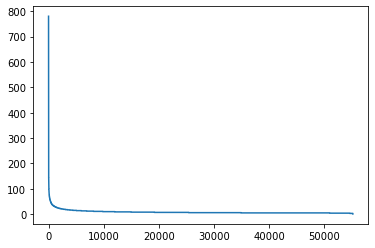

In [18]:
plt.plot(range(review_per_person.shape[0]), review_per_person['num_review'])

## criteria per person

In [19]:
criteria_per_person = least_review.groupby('reviewerID')['overall'].agg(
    ['mean', 'std', 'count']).reset_index()
criteria_per_person = criteria_per_person.fillna(0)

In [20]:
criteria_per_person['count'].mean()
criteria_per_person['count'].max()
criteria_per_person['count'].min()

8.580193035510566

780

1

In [21]:
criteria_per_person['std'].mean()
criteria_per_person['std'].max()
criteria_per_person['std'].min()

0.8237933296662795

2.8284271247461903

0.0

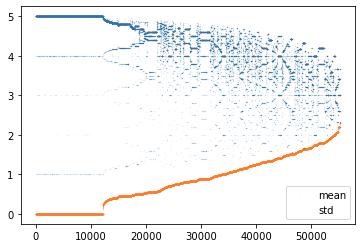

In [22]:
criteria_per_person = criteria_per_person.sort_values(by='std')
plt.scatter(range(criteria_per_person.shape[0]), criteria_per_person['mean'], s=0.001, label='mean')
plt.scatter(range(criteria_per_person.shape[0]), criteria_per_person['std'], s=0.001, label='std')
plt.legend()

## review per game

In [23]:
review_per_game = least_review['asin'].value_counts().reset_index()
review_per_game.columns = ['asin', 'num_review']
print(f"asin(total): {review_per_game.shape[0]}")

less_than_10 = review_per_game[review_per_game['num_review'] < 10]
print(f"asin(num review < 10): {less_than_10.shape[0]}")
less_than_10['num_review'].value_counts()

asin(total): 17408
asin(num review < 10): 6880


5    1938
6    1546
7    1240
8    1087
9     881
4      76
2      43
3      43
1      26
Name: num_review, dtype: int64

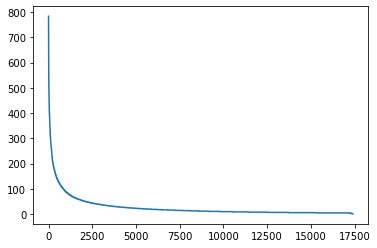

In [24]:
plt.plot(range(review_per_game.shape[0]), review_per_game['num_review'])

## performance per game

In [25]:
perf_per_game = least_review.groupby('asin')['overall'].agg(
    ['mean', 'std', 'count']).reset_index()
perf_per_game = perf_per_game.fillna(0)

In [26]:
perf_per_game['count'].mean()
perf_per_game['count'].max()
perf_per_game['count'].min()

27.21875

783

1

In [27]:
perf_per_game['std'].mean()
perf_per_game['std'].max()
perf_per_game['std'].min()

1.061868368091277

2.8284271247461903

0.0

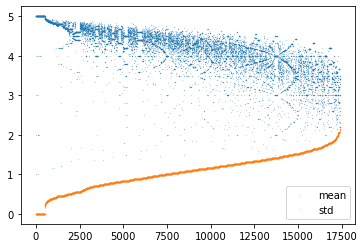

In [28]:
perf_per_game = perf_per_game.sort_values(by='std')
plt.scatter(range(perf_per_game.shape[0]), perf_per_game['mean'], s=0.01, label='mean')
plt.scatter(range(perf_per_game.shape[0]), perf_per_game['std'], s=0.01, label='std')
plt.legend()

# Filter Data and Split Data

according to the EDA, choose reviewer who has more than 3 reviews, and choose game which has more than 4 reviews

In [29]:
keep_person = review_per_person[review_per_person['num_review'] > 3]
keep_game = review_per_game[review_per_game['num_review'] > 4]

In [30]:
least_review.shape
filtered_review = pd.merge(least_review, keep_person, on='reviewerID', how='inner')
filtered_review.shape
filtered_review = pd.merge(filtered_review, keep_game, on='asin', how='inner', suffixes=("_ps", "_gm"))
filtered_review.shape
filtered_review = filtered_review.sort_values(by='reviewTime').reset_index(drop=True)

(473824, 7)

(472080, 8)

(471551, 9)

In [31]:
filtered_review

,overall,asin,reviewTime,reviewerID,reviewerName,reviewText,summary,num_review_ps,num_review_gm
0,5.0,B0000296O5,1999-10-14,A2AXQTB83VMK4L,Amazon Customer,I'm having the most fun I've ever had on PlayS...,Best RPG Ever!,6,268
1,4.0,B00002NDRY,1999-11-05,A2T04VAIXSKJH2,Stefan,I'm usually not crazy about real-time strategy...,Good real time strategy game,6,67
2,3.0,B000021Y5V,1999-11-10,A1QA8K3LD9K892,Chris Adamson,"The graphics are mediocre, the fog and pop-up ...","Disappointing, but servicable",23,5
3,4.0,B000021XYY,1999-11-10,AMGJMFJ63DWWH,Ed Matuskey,"This game actually scared me a couple times, a...","A good game, but way too short!",5,14
4,5.0,B000021Y5Q,1999-11-10,A1QA8K3LD9K892,Chris Adamson,This is the football game to play with friends...,Easy-to-learn football hijinks,23,7
...,...,...,...,...,...,...,...,...,...
471546,5.0,B01GW8YDLK,2018-09-30,ANS2OWH7CK1M9,Augi,"I've never bought a Spider-Man game until now,...",An epic experience that sets the precedent on ...,6,68
471547,5.0,B01GW3H3U8,2018-10-01,A1SDXNTHJ255P7,Rob G.,Upgrade from the original XB1 controller. It ...,It feels much better in your,11,9
471548,5.0,B01GW8YDLK,2018-10-01,A1TCZLL90BWIWH,Erebor,It deserves its reviews. Great game play and g...,Gamers: don't miss this one!,9,68
471549,4.0,B01GKF824Y,2018-10-01,A3R7Y70K7ZPJ3I,Speed E Byer,intense have to get use to the play action,Four Stars,6,80


Split train set to test set equals to 9: 1, besides we need to use history to predict future, therefore we must split the whole data from timestamp

In [32]:
time_split = filtered_review.iloc[int(filtered_review.shape[0] * 0.9)]['reviewTime']
time_split

Timestamp('2017-01-16 00:00:00')

In [33]:
train_data = filtered_review[filtered_review['reviewTime'] < '2017-01-16']
train_data.shape
test_data = filtered_review[filtered_review['reviewTime'] >= '2017-01-16']
test_data.shape

(424371, 9)

(47180, 9)

In [34]:
test_data

,overall,asin,reviewTime,reviewerID,reviewerName,reviewText,summary,num_review_ps,num_review_gm
424371,5.0,B01FK3H4R8,2017-01-16,A3211IGL56WLBK,Kelsey Marie,My four year old plays this game on her 2DS an...,Reading Required,6,9
424372,5.0,B00DEL3IIS,2017-01-16,A23819LXXJUYQW,Omar Hannun,I saw the movie but I never play the game and ...,... movie but I never play the game and I love...,9,299
424373,5.0,B01GWGXHKK,2017-01-16,A2KONEBU6X0WO9,Ryan,great game,awesome,5,37
424374,5.0,B006TPS73W,2017-01-16,A27AHY7XUMKD3O,Steven Mitchell,"Great piece, everything I expected!",Five Stars,8,15
424375,5.0,B00ISW0TGW,2017-01-16,A3GNHW8EZETXKD,DANIEL+SON,If you plan on using this for UNCHARTED 4 on P...,Only for COD,6,55
...,...,...,...,...,...,...,...,...,...
471546,5.0,B01GW8YDLK,2018-09-30,ANS2OWH7CK1M9,Augi,"I've never bought a Spider-Man game until now,...",An epic experience that sets the precedent on ...,6,68
471547,5.0,B01GW3H3U8,2018-10-01,A1SDXNTHJ255P7,Rob G.,Upgrade from the original XB1 controller. It ...,It feels much better in your,11,9
471548,5.0,B01GW8YDLK,2018-10-01,A1TCZLL90BWIWH,Erebor,It deserves its reviews. Great game play and g...,Gamers: don't miss this one!,9,68
471549,4.0,B01GKF824Y,2018-10-01,A3R7Y70K7ZPJ3I,Speed E Byer,intense have to get use to the play action,Four Stars,6,80


# Base model as benchmark

## overall average as prediction

In [35]:
from sklearn.metrics import mean_absolute_error as mae

In [36]:
overall_pred = train_data['overall'].mean()
overall_pred

4.215396433780819

In [37]:
mae(test_data['overall'], np.array([overall_pred]*test_data.shape[0]))

0.9455581435548922

## Person perference as prediction

In [38]:
pred_person = train_data.groupby('reviewerID')['overall'].mean().reset_index()
pred_person.columns = ['reviewerID', 'pred_y']
pred_person.head()

,reviewerID,pred_y
0,A0059486XI1Z0P98KP35,5.000000
1,A0220159ZRNBTRKLG08H,4.600000
2,A0266076X6KPZ6CCHGVS,5.000000
3,A0277912HT4JSJKVSL3E,4.500000
4,A02836981FYG9912C66F,3.666667


In [39]:
res_df = pd.merge(test_data[['overall', 'asin', 'reviewerID']], pred_person, 
                  on='reviewerID', how='left')
res_df = res_df.fillna(overall_pred)

In [40]:
mae(res_df['overall'], res_df['pred_y'])

0.8504287455197004

## Game performance as prediction

In [41]:
pred_game = train_data.groupby('asin')['overall'].mean().reset_index()
pred_game.columns = ['asin', 'pred_y']
pred_game.head()

,asin,pred_y
0,0700026398,3.125000
1,0700026657,3.583333
2,0700099867,3.300000
3,0804161380,4.826087
4,3828770193,4.333333


In [42]:
res_df = pd.merge(test_data[['overall', 'asin', 'reviewerID']], pred_game, 
                  on='asin', how='left')
res_df = res_df.fillna(overall_pred)

In [43]:
mae(res_df['overall'], res_df['pred_y'])

0.8898432407869299

## Combine Person and Game

In [44]:
res_df = pd.merge(test_data[['overall', 'asin', 'reviewerID']], pred_person, 
                  on='reviewerID', how='left')
res_df = pd.merge(res_df, pred_game, 
                  on='asin', how='left', suffixes=("_ps", "_gm"))
res_df['pred_y'] = res_df[['pred_y_ps', 'pred_y_gm']].mean(axis=1)
res_df = res_df.fillna(overall_pred)
res_df.head()

,overall,asin,reviewerID,pred_y_ps,pred_y_gm,pred_y
0,5.0,B01FK3H4R8,A3211IGL56WLBK,4.000000,5.000000,4.500000
1,5.0,B00DEL3IIS,A23819LXXJUYQW,4.800000,3.931624,4.365812
2,5.0,B01GWGXHKK,A2KONEBU6X0WO9,1.000000,4.600000,2.800000
3,5.0,B006TPS73W,A27AHY7XUMKD3O,4.750000,4.571429,4.660714
4,5.0,B00ISW0TGW,A3GNHW8EZETXKD,4.215396,4.388889,4.388889


In [45]:
mae(res_df['overall'], res_df['pred_y'])

0.8384465732533352

In [46]:
with open(os.path.join(PRE_DIR, 'rating_data.pkl'), 'wb') as f:
    pickle.dump(rating_data, f)

In [47]:
with open(os.path.join(PRE_DIR, 'review_data.pkl'), 'wb') as f:
    pickle.dump(review_data, f)